# K-Means Algorithm

In [1]:
import math
import numpy as np
import pandas as pd
from itertools import cycle

%matplotlib notebook
import matplotlib.pyplot as plt
            
colors = cycle('bgrcmk')

## Generate random clusters

<IPython.core.display.Javascript object>


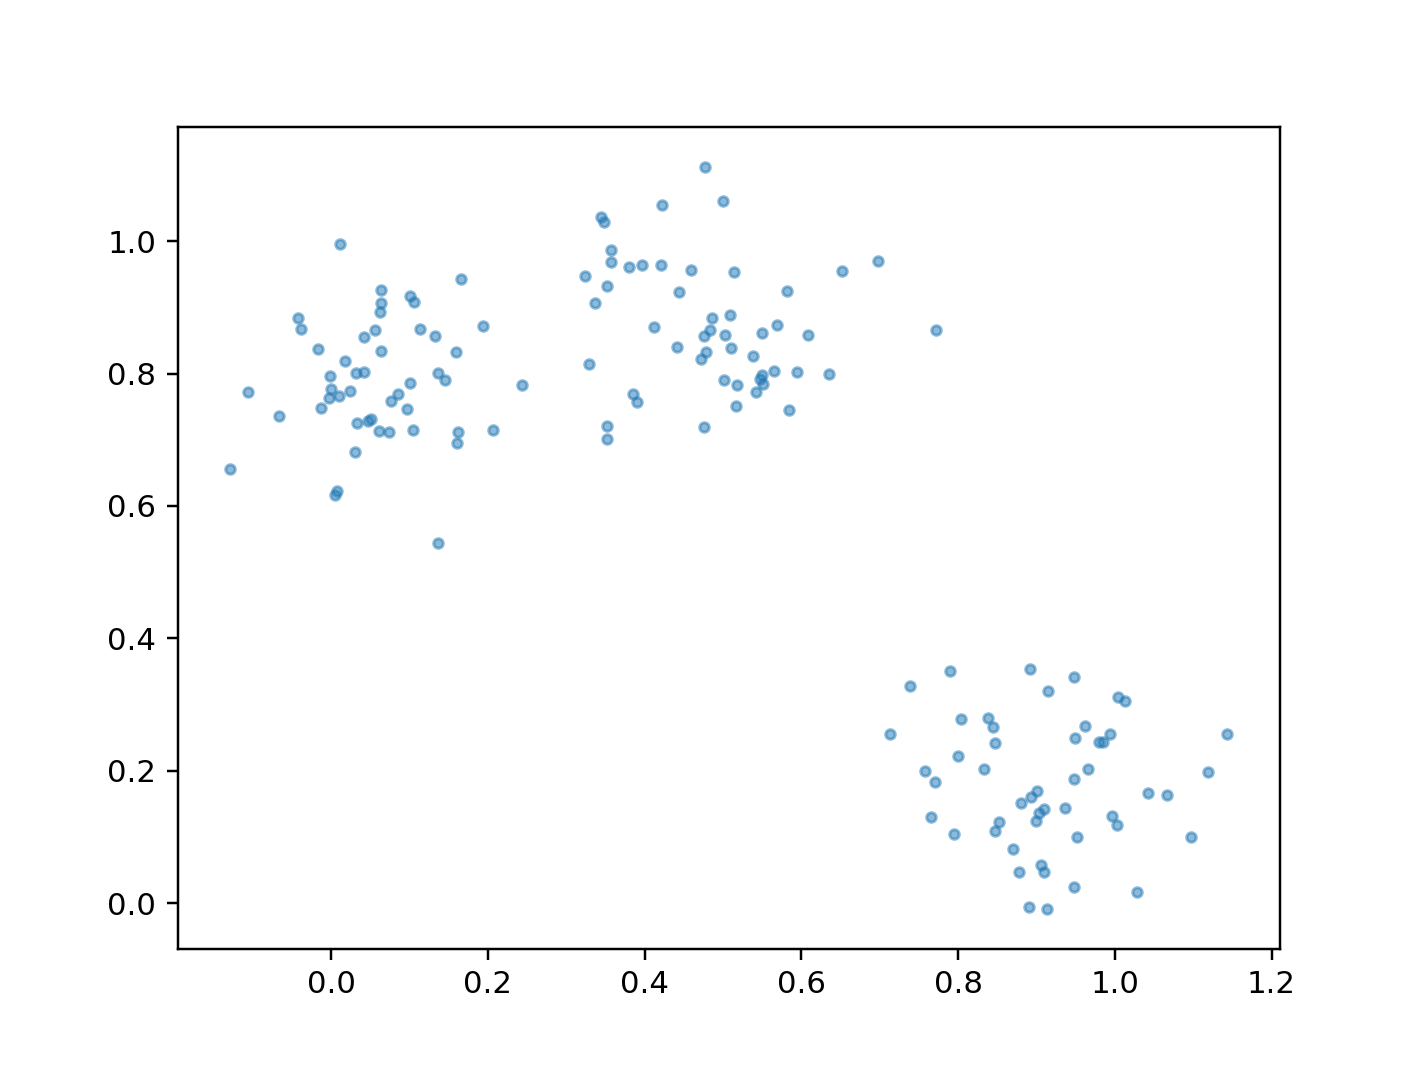

In [2]:
# pick random centers
n_clusters = 3
dots_per_cluster = 50
rand_x = np.random.rand(n_clusters)
rand_y = np.random.rand(n_clusters)

x_s = np.array([])
y_s = np.array([])

# for each center, generate multiple points randomly around the center
for i in range(0, n_clusters):    
    center = (rand_x[i], rand_y[i])
    x, y = np.random.multivariate_normal(center, [[.01, 0], [0, .01]], dots_per_cluster).T
    x_s = np.concatenate((x_s, x))
    y_s = np.concatenate((y_s, y))
    
    
# plot the clusters
plt.figure()
plt.scatter(x_s, y_s, s=np.pi*3, alpha=.5)
plt.show()

## K-Mean Algorithm

In [3]:
def dist(x_1, y_1, x_2, y_2):
    return math.sqrt(math.pow(x_2-x_1 ,2) + math.pow(y_2-y_1 ,2))

In [4]:
def assign_points_to_centroids(k, centroid_x_s, centroid_y_s, x_s, y_s):
    points_by_centroid = { i: [] for i in range(0, k) }
    for i in range(0, len(x_s)):
        
        # compute the distance to each centroid
        distances = [dist(x_s[i], y_s[i], centroid_x_s[c_i], centroid_y_s[c_i]) for c_i in range(0, k)]
        closest_centroid_index = np.argmin(distances)
        
        # add point to closest centroid
        points_by_centroid[closest_centroid_index].append(i)
    return points_by_centroid


def plot_state(k, x_s, y_s, centroid_x_s, centroid_y_s):
    points_by_centroid = assign_points_to_centroids(k, centroid_x_s, centroid_y_s, x_s, y_s)
    
    # plot assignments
    plt.figure()
    for centroid_idx, point_indices in points_by_centroid.items():
        
        c = next(colors)

        # plot the centroid
        plt.plot(centroid_x_s[centroid_idx], centroid_y_s[centroid_idx], marker='P', color=c)
        
        plt.scatter(np.take(x_s, point_indices), np.take(y_s, point_indices), s=np.pi*3, color=c, alpha=.5)
    plt.show()
    

def recompute_centroids(k, x_s, y_s, centroid_x_s, centroid_y_s):
    points_by_centroid = assign_points_to_centroids(k, centroid_x_s, centroid_y_s, x_s, y_s)
    
    for idx, point_indices in enumerate(points_by_centroid.values()):
        if len(point_indices) == 0:
            print('lost an index')
        centroid_x_s[idx] = np.mean(np.take(x_s, point_indices))
        centroid_y_s[idx] = np.mean(np.take(y_s, point_indices))
        
        
def k_means(k, x_s, y_s, iterations=10):
    centroid_x_s = np.random.rand(k)
    centroid_y_s = np.random.rand(k)
    
    for i in range(0, iterations):
        print(f'iter  {i+1}')
        recompute_centroids(k, x_s, y_s, centroid_x_s, centroid_y_s)
    return centroid_x_s, centroid_y_s
    

iter  1
iter  2
iter  3
iter  4
iter  5
iter  6
iter  7
iter  8
iter  9
iter  10


<IPython.core.display.Javascript object>


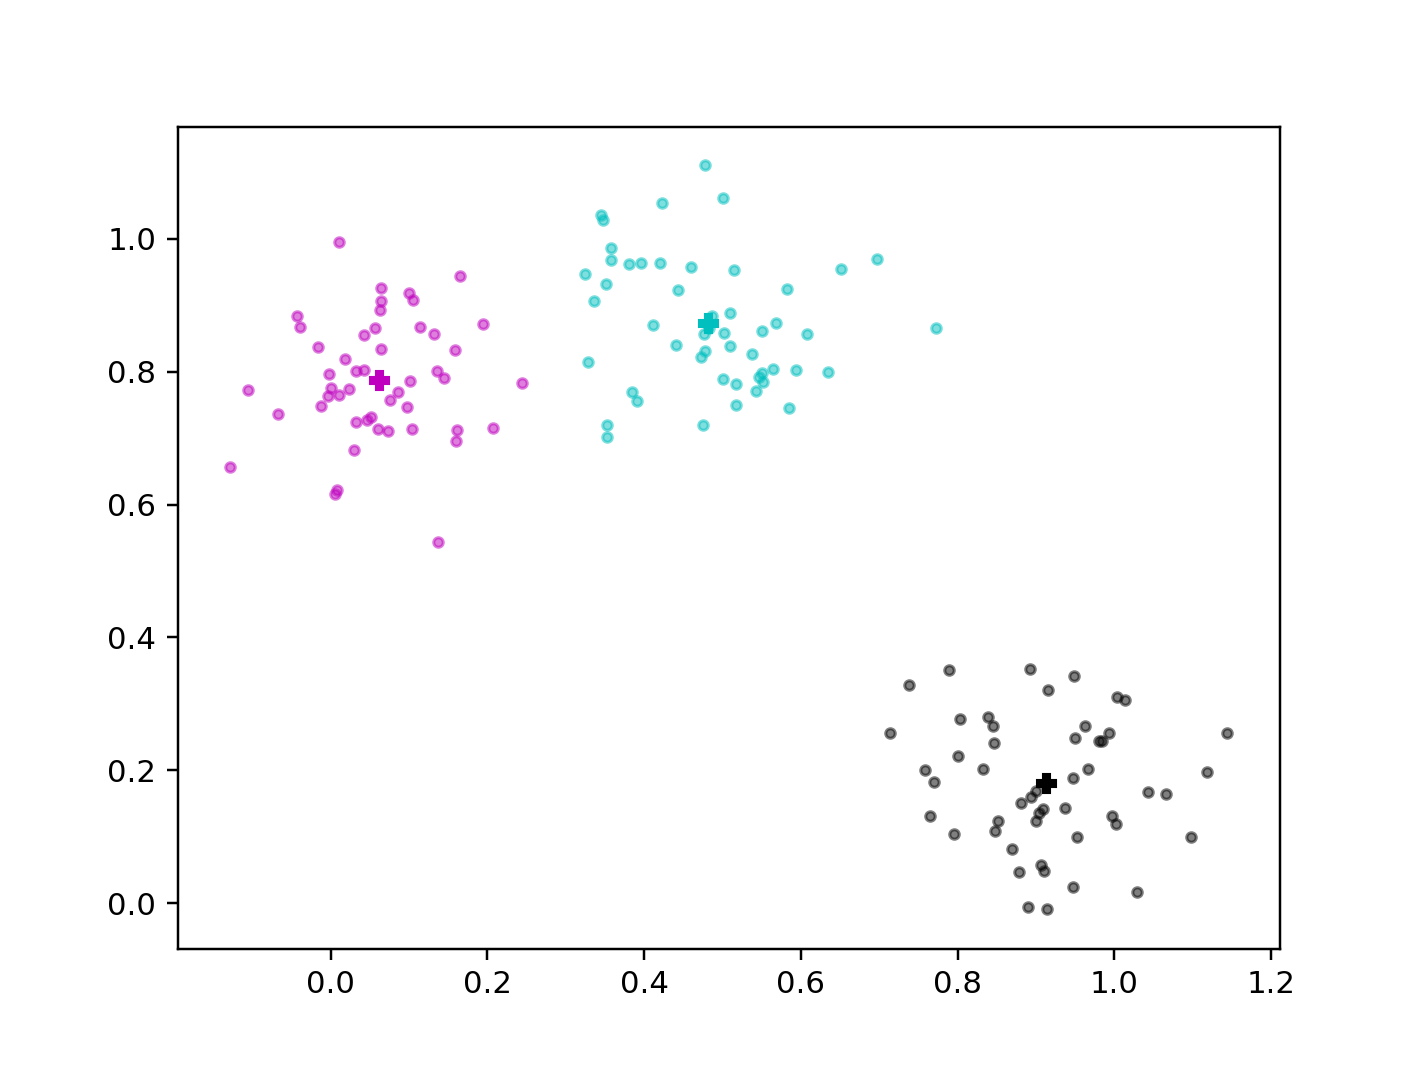

In [6]:
k = 3
centroid_x_s, centroid_y_s = k_means(k, x_s, y_s)

plot_state(k, x_s, y_s, centroid_x_s, centroid_y_s)

## Initialize K-Means with farthest apart points

In [7]:
# source: https://codereview.stackexchange.com/questions/179561/farthest-point-algorithm-in-python
def calc_distances(p0, points):
    return ((p0 - points)**2).sum(axis=1)

def farthest_points(pts, K):
    farthest_pts = np.zeros((K, 2))
    farthest_pts[0] = pts[np.random.randint(len(pts))]
    distances = calc_distances(farthest_pts[0], pts)
    for i in range(1, K):
        farthest_pts[i] = pts[np.argmax(distances)]
        distances = np.minimum(distances, calc_distances(farthest_pts[i], pts))
    return farthest_pts

<IPython.core.display.Javascript object>


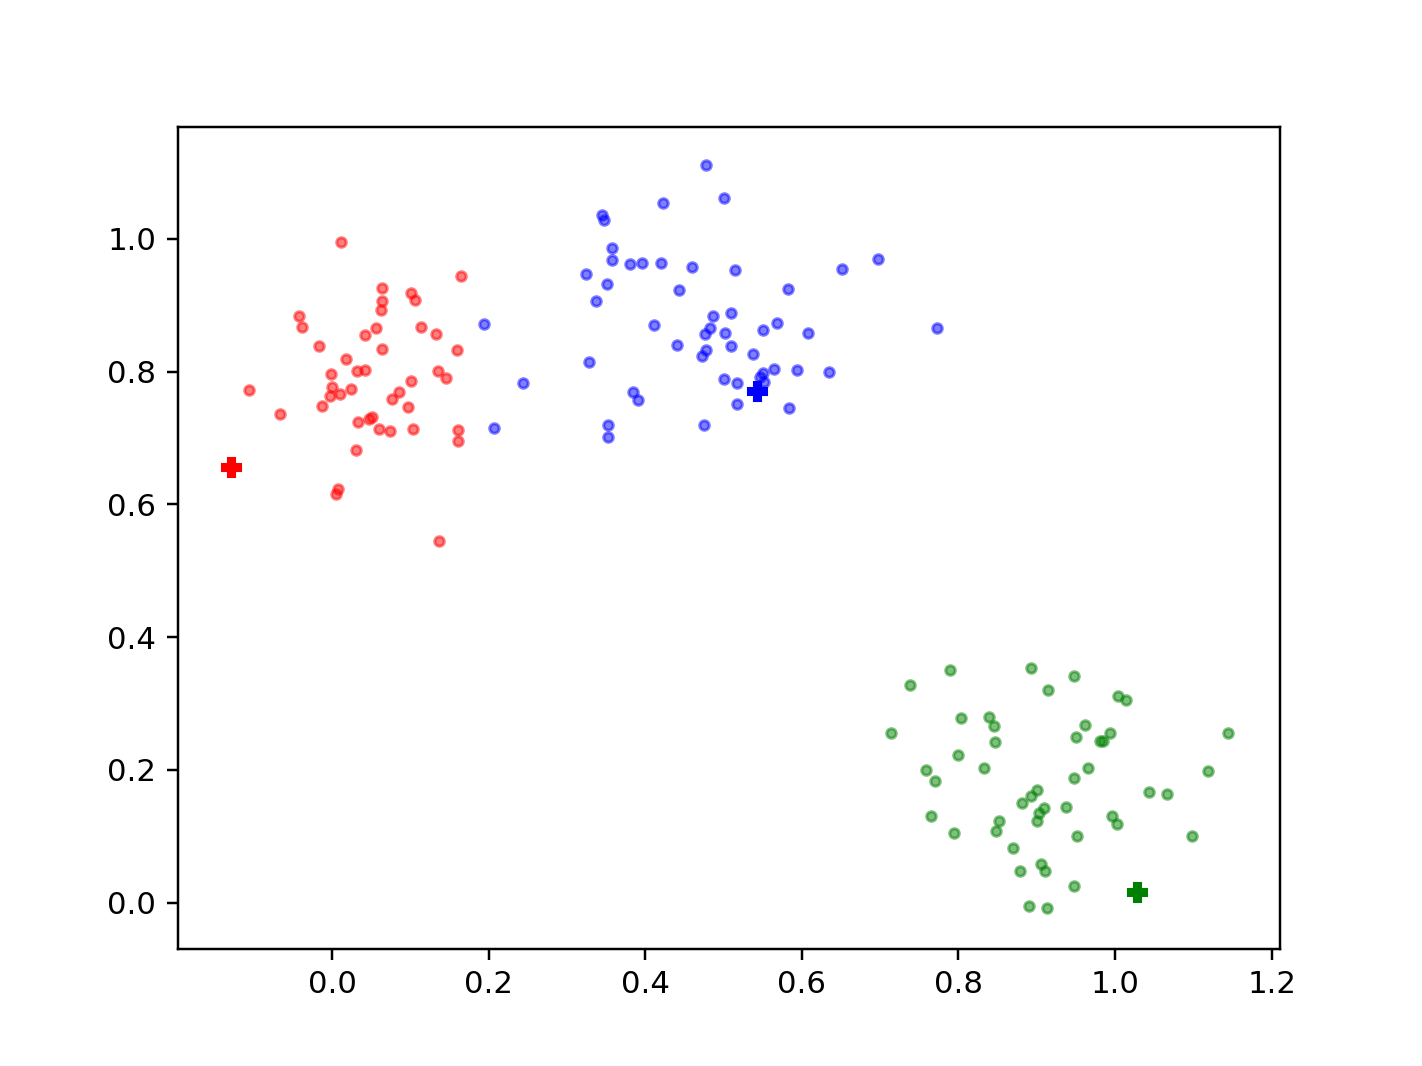

In [8]:
farthest_pts = farthest_points(np.dstack((x_s, y_s))[0], 3)

centroid_x_s = farthest_pts.T[0]
centroid_y_s = farthest_pts.T[1]

plot_state(k, x_s, y_s, centroid_x_s, centroid_y_s)

In [9]:
def k_means_modified(k, x_s, y_s, iterations=10):
    
    farthest_pts = farthest_points(np.dstack((x_s, y_s))[0], k)

    centroid_x_s = farthest_pts.T[0]
    centroid_y_s = farthest_pts.T[1]
    
    
    for i in range(0, iterations):
        print(f'iter  {i+1}')
        recompute_centroids(k, x_s, y_s, centroid_x_s, centroid_y_s)
    return centroid_x_s, centroid_y_s

iter  1
iter  2
iter  3
iter  4
iter  5
iter  6
iter  7
iter  8
iter  9
iter  10


<IPython.core.display.Javascript object>


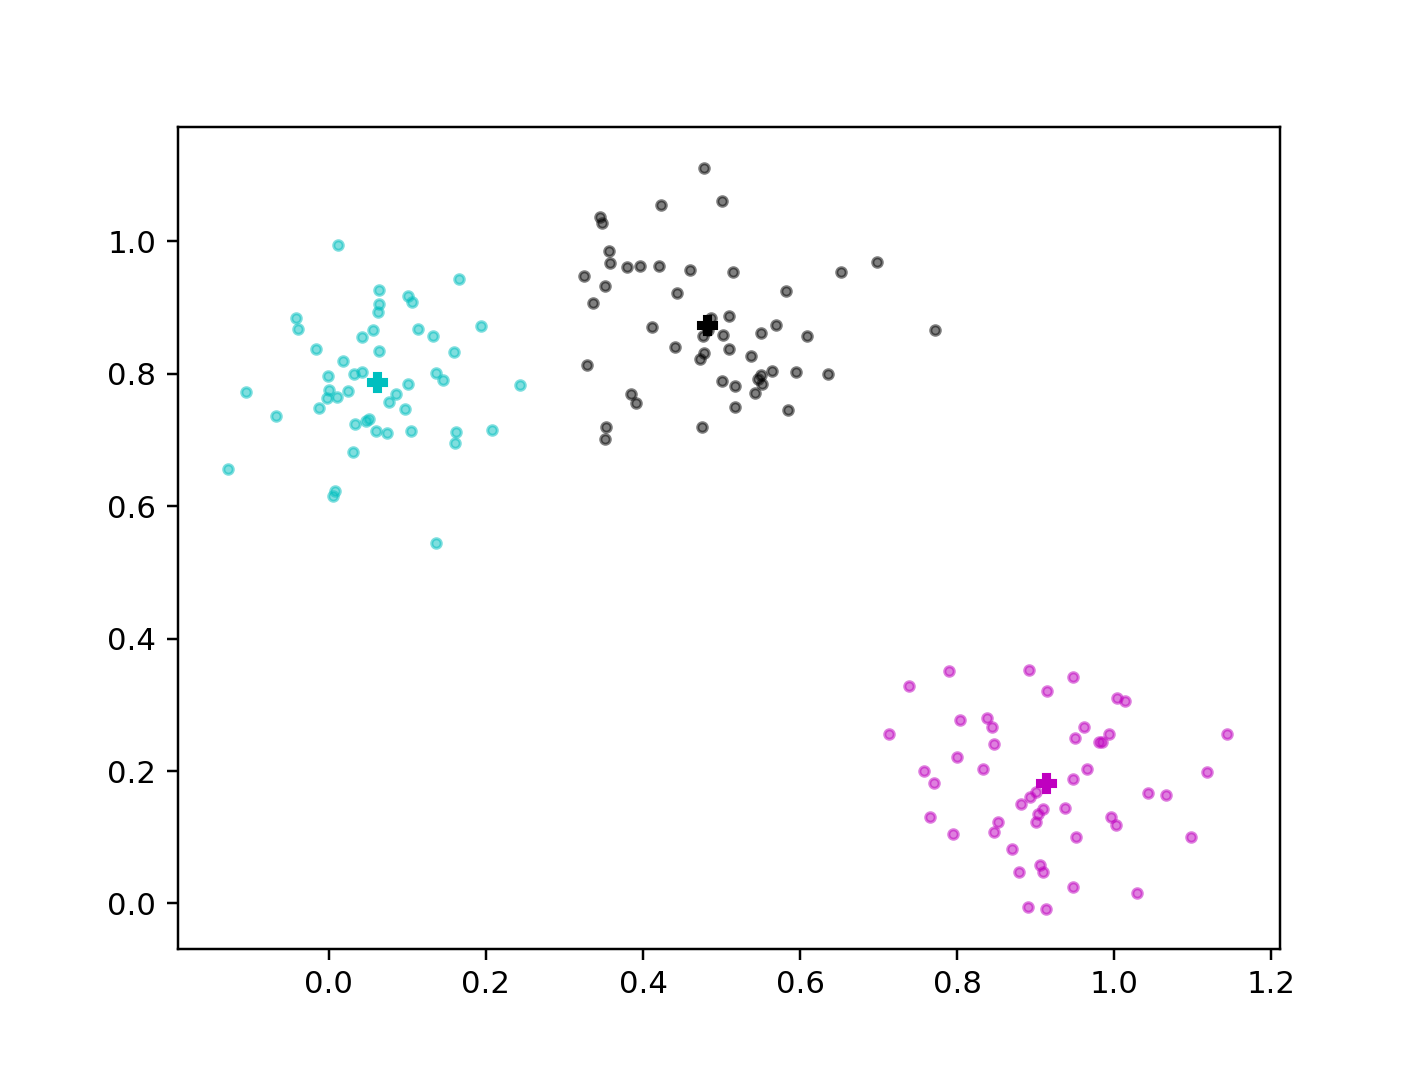

In [10]:
k = 3
centroid_x_s, centroid_y_s = k_means_modified(k, x_s, y_s)

plot_state(k, x_s, y_s, centroid_x_s, centroid_y_s)

## Let's do something useful: plot earthquake centers!

In [115]:
!pip install shapely
!pip install geopandas
!pip install descartes

In [116]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

In [117]:
csv = pd.read_csv('./quakes.csv')

In [118]:
csv.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2019-09-07T04:08:17.640Z,35.706500,-117.559833,1.97,0.82,ml,16.0,125.0,0.084610,0.14,...,2019-09-07T04:11:53.379Z,"14km NE of Ridgecrest, CA",earthquake,0.27,0.40,0.121,10.0,automatic,ci,ci
1,2019-09-07T04:05:10.340Z,34.027833,-117.153667,11.01,1.52,ml,50.0,47.0,0.035100,0.17,...,2019-09-07T04:16:28.020Z,"4km SE of Redlands, CA",earthquake,0.18,0.38,0.214,24.0,automatic,ci,ci
2,2019-09-07T04:03:17.670Z,35.793833,-117.621333,3.24,0.53,ml,12.0,85.0,0.029200,0.20,...,2019-09-07T04:06:52.351Z,"20km W of Searles Valley, CA",earthquake,0.54,0.87,0.063,7.0,automatic,ci,ci
3,2019-09-07T03:55:10.799Z,61.811500,-150.203800,24.20,1.10,ml,NaN,NaN,NaN,0.84,...,2019-09-07T04:01:40.184Z,"11km NW of Willow, Alaska",earthquake,NaN,0.30,NaN,NaN,automatic,ak,ak
4,2019-09-07T03:40:27.370Z,37.624832,-118.857666,7.68,0.94,md,10.0,144.0,0.007184,0.08,...,2019-09-07T03:56:03.112Z,"11km E of Mammoth Lakes, CA",earthquake,1.64,2.12,0.170,10.0,automatic,nc,nc


<IPython.core.display.Javascript object>


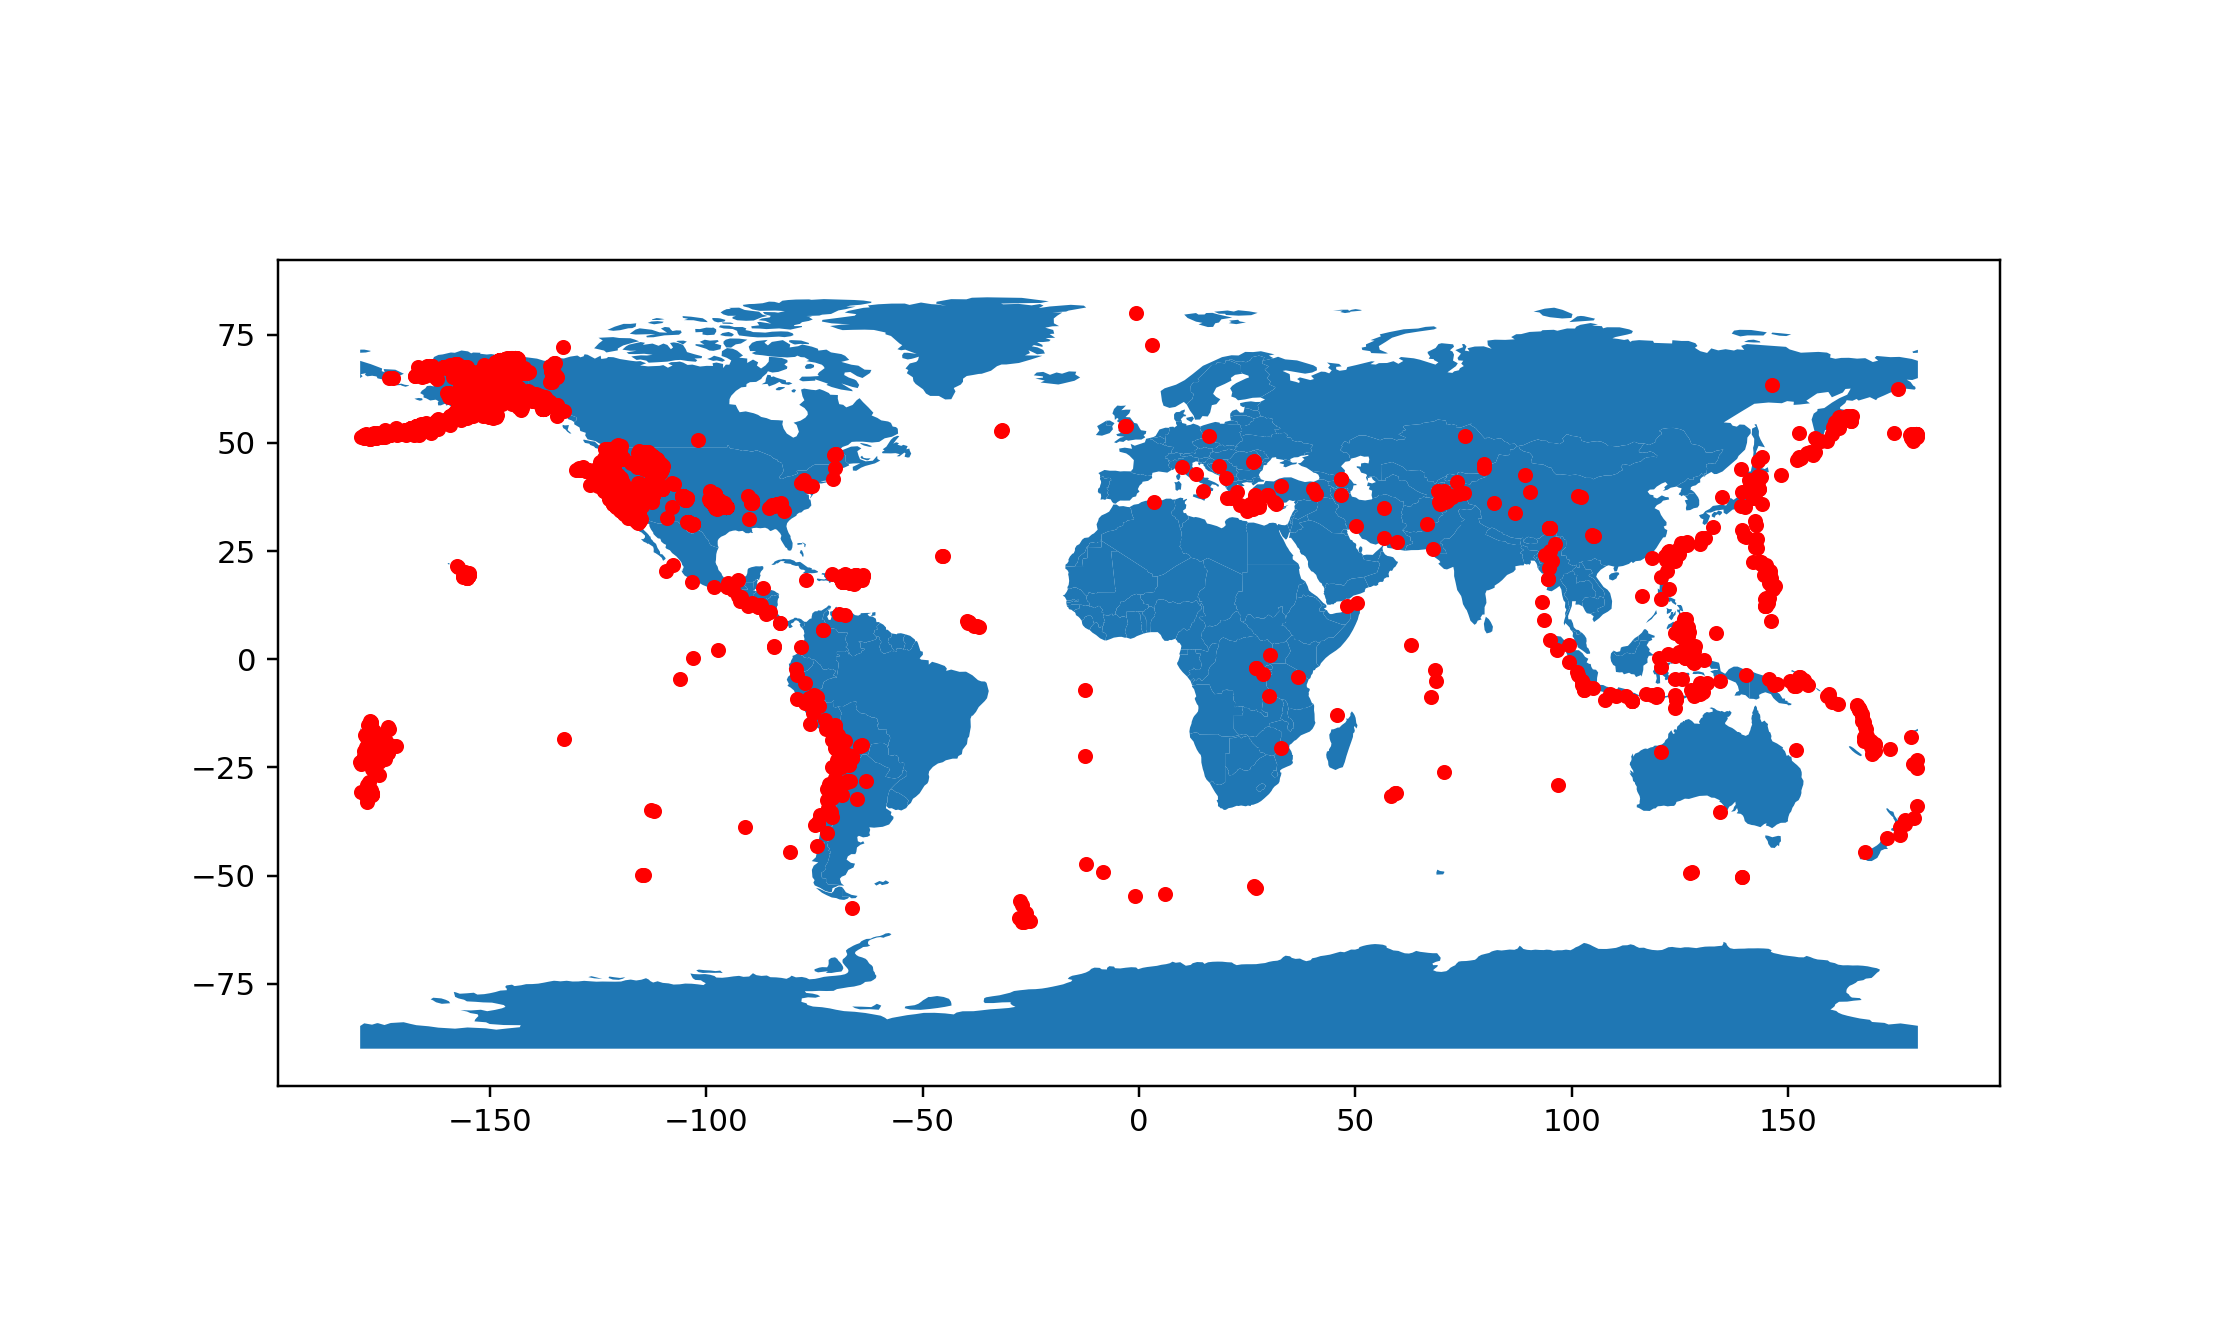

In [119]:
geometry = [Point(xy) for xy in zip(csv['longitude'], csv['latitude'])]
gdf = GeoDataFrame(csv, geometry=geometry)   
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

## Let's find the top 10 earthquake centers!

iter  1
iter  2
iter  3
iter  4
iter  5
iter  6
iter  7
iter  8
iter  9
iter  10


<IPython.core.display.Javascript object>


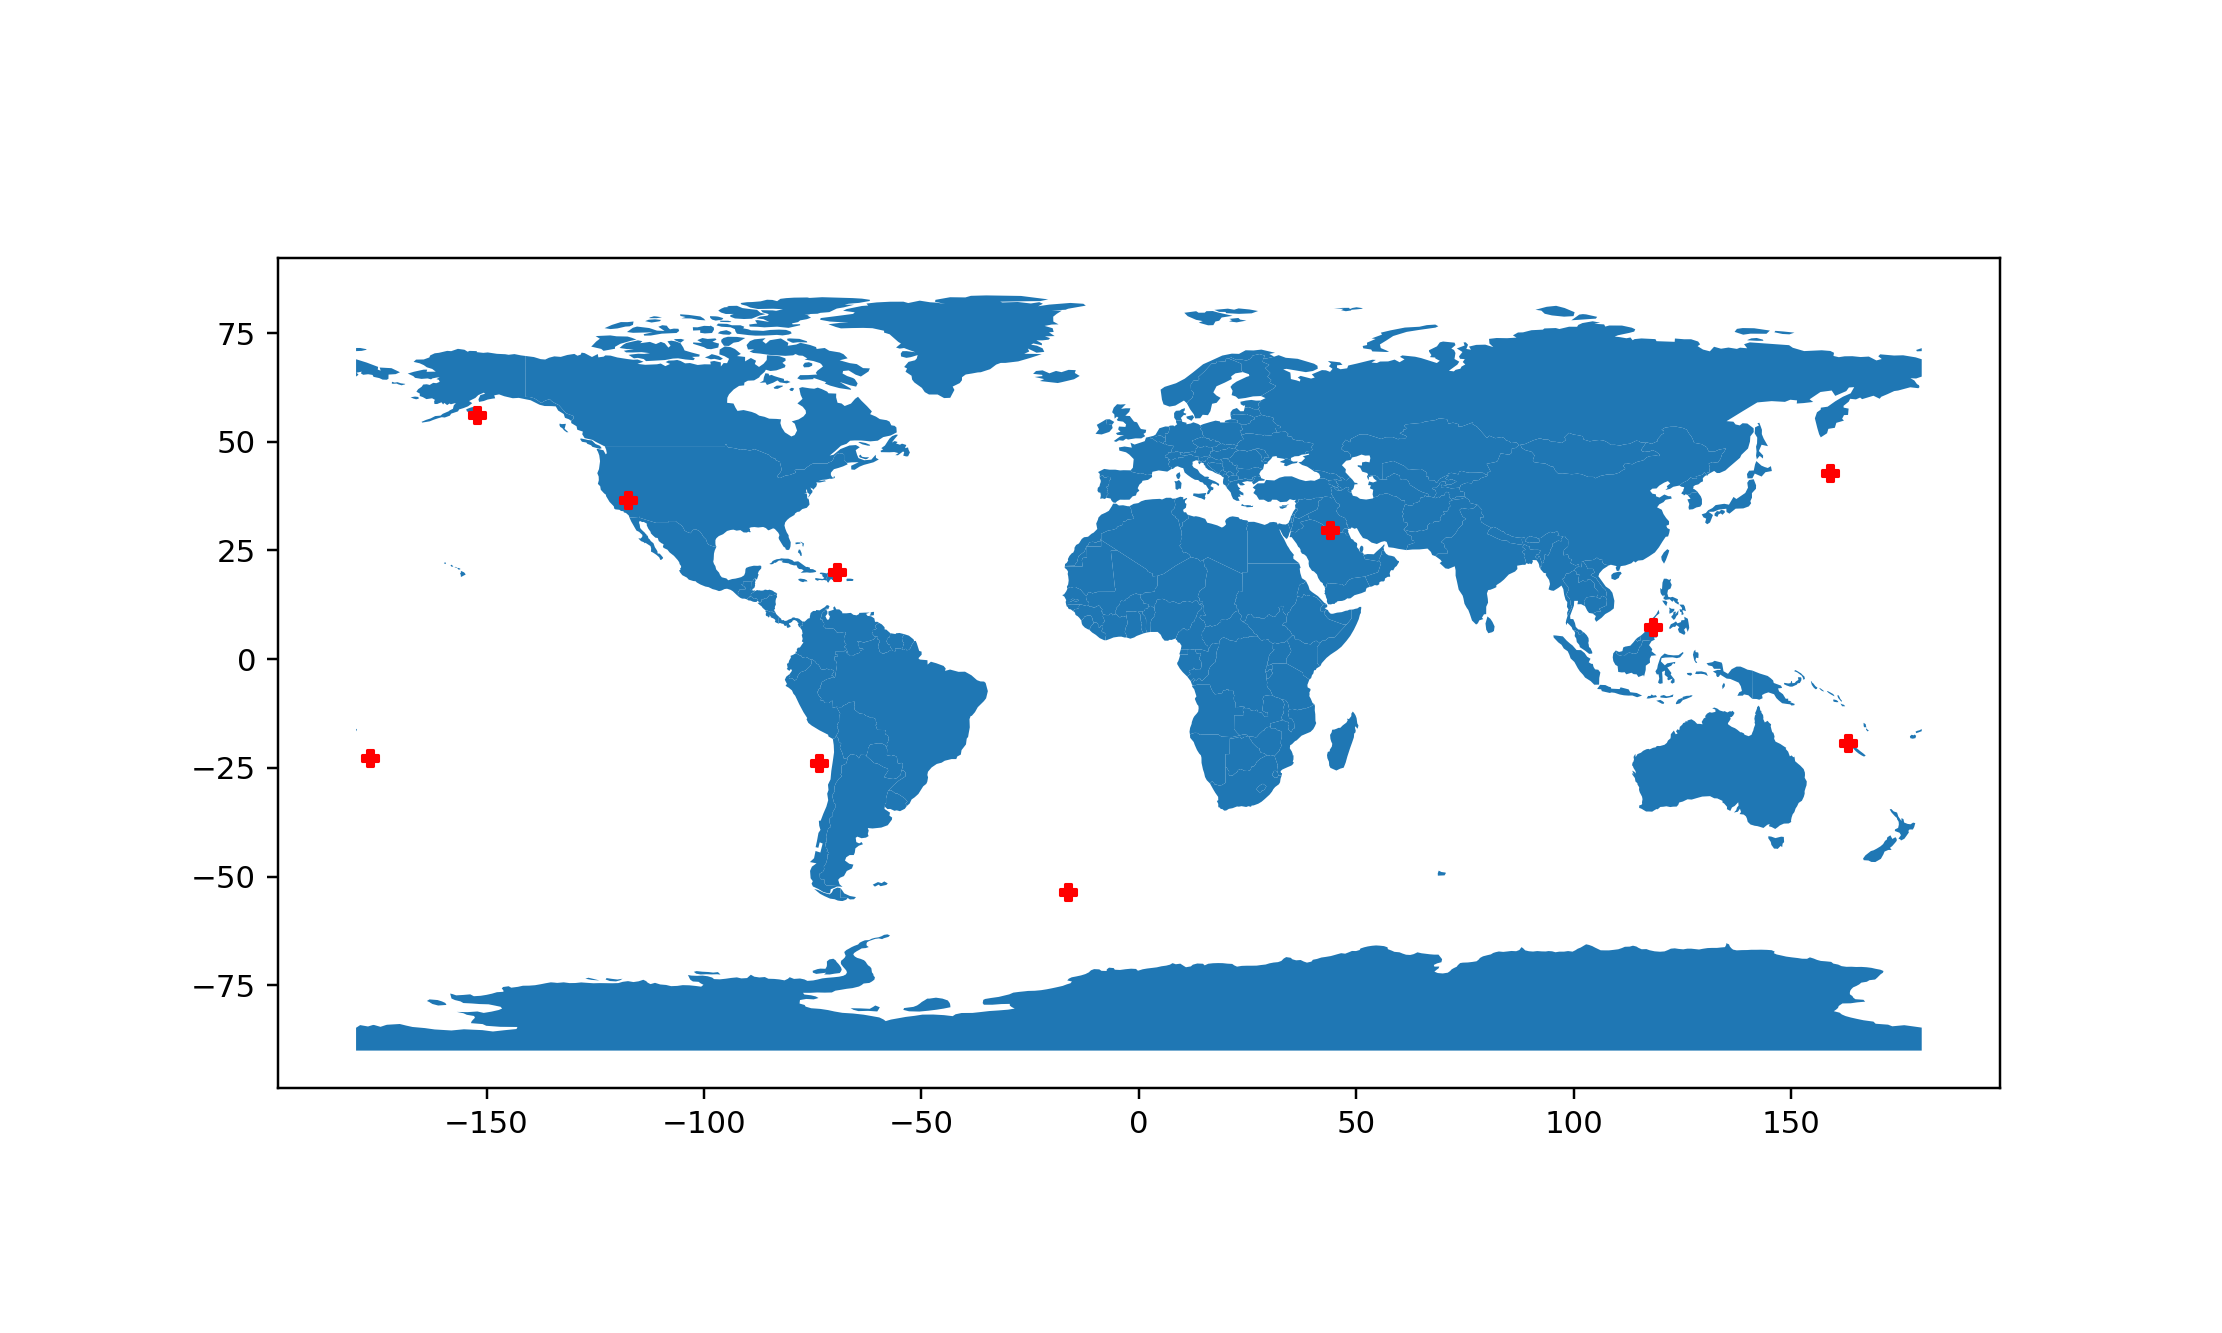

In [149]:
k = 10
centroid_x_s, centroid_y_s = k_means_modified(k, csv['longitude'].values, csv['latitude'].values)

df = pd.DataFrame(list(range(0, k)), columns = ['Centroid Idx'])

geometry = [Point(xy) for xy in zip(centroid_x_s, centroid_y_s)]
gdf = GeoDataFrame(df, geometry=geometry)   
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='P', color='red', markersize=30);